<a href="https://colab.research.google.com/github/salarbalou/Experimetal_Resulsts/blob/main/Light_To_Heat_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import numpy as np
import plotly.io as pio
import scipy.interpolate as interp
import scipy.optimize as opt
import matplotlib.pyplot as plt
pio.templates.default= 'plotly_white'
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

In [226]:
m, b = 7.025524475524473, -66.07575757575763
dcs = np.array([20, 40, 60, 80, 100])
Iout = m*dcs+b

w80 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/water_1_80.txt', delimiter = ',')
w60 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/water_1_60.txt', delimiter = ',')
w40 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/water_1_40.txt', delimiter = ',')
w20 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/water_1_20.txt', delimiter = ',')
w100 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/water_1_100.txt', delimiter = ',')

tw80, Tw80 = w80[:, 0][11:]-11, w80[:, 1][11:]
tw60, Tw60 = w60[:, 0][11:]-11, w60[:, 1] [11:]
tw40, Tw40 = w40[:, 0][11:]-11, w40[:, 1][11:] 
tw20, Tw20 = w20[:, 0][11:]-11, w20[:, 1][11:] 
tw100, Tw100 = w100[:, 0][11:]-11, w100[:, 1][11:]

figure1 = make_subplots()
figure1.add_trace(go.Scatter(x = tw100, y = Tw100, mode = 'markers+lines', name = 'Water 636.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
figure1.add_trace(go.Scatter(x = tw80, y = Tw80, mode = 'markers+lines', name =  'Water 496.0 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'square', line = dict(color = 'black', width = 2))))
figure1.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name =  'Water 355.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'circle', line = dict(color = 'black', width = 2))))
figure1.add_trace(go.Scatter(x = tw40, y = Tw40, mode = 'markers+lines', name =  'Water 214.9 mW',  marker = dict(size = 10, color = 'lightblue', symbol = 'diamond', line = dict(color = 'black', width = 2))))
figure1.add_trace(go.Scatter(x = tw20, y = Tw20, mode = 'markers+lines', name =  'Water 74.4 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'cross', line = dict(color = 'black', width = 2))))


figure1.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (seconds)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 20], showgrid = False, linecolor = 'black')
figure1.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 50], showgrid = False, linecolor = 'black')
figure1.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.99, xanchor = 'left', x= 0.01))
figure1.show()

In [227]:
m, b = 7.025524475524473, -66.07575757575763
dcs = np.array([20, 40, 60, 80, 100])
Iout = m*dcs+b

#source data for r-cds
r100 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_100.txt', delimiter = ',')
r80 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_80.txt', delimiter = ',')
r60 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_60.txt', delimiter = ',')
r40 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_40.txt', delimiter = ',')
r20 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_20.txt', delimiter = ',')

#vectors of r-cds
tr80, Tr80 = r80[:, 0][11:]-11, r80[:, 1][11:]
tr60, Tr60 = r60[:, 0][11:]-11, r60[:, 1] [11:]
tr40, Tr40 = r40[:, 0][11:]-11, r40[:, 1][11:] 
tr20, Tr20 = r20[:, 0][11:]-11, r20[:, 1][11:] 
tr100, Tr100 = r100[:, 0][11:]-11, r100[:, 1][11:]

figure2 = make_subplots()

#water
figure2.add_trace(go.Scatter(x = tw100, y = Tw100, mode = 'markers+lines', name = 'Water 636.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure2.add_trace(go.Scatter(x = tw80, y = Tw80, mode = 'markers+lines', name =  'Water 496.0 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'square', line = dict(color = 'black', width = 2))))
#figure2.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name =  'Water 355.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'circle', line = dict(color = 'black', width = 2))))
#figure2.add_trace(go.Scatter(x = tw40, y = Tw40, mode = 'markers+lines', name =  'Water 214.9 mW',  marker = dict(size = 10, color = 'lightblue', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure2.add_trace(go.Scatter(x = tw20, y = Tw20, mode = 'markers+lines', name =  'Water 74.4 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'cross', line = dict(color = 'black', width = 2))))

#r-cds
figure2.add_trace(go.Scatter(x = tr100, y = Tr100, mode = 'markers+lines', name = 'r-cds 636.5 mW', marker = dict(size = 10, color = 'red', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
figure2.add_trace(go.Scatter(x = tr80, y = Tr80, mode = 'markers+lines', name =  'r-cds 496.0 mW', marker = dict(size = 10, color = 'red', symbol = 'square', line = dict(color = 'black', width = 2))))
figure2.add_trace(go.Scatter(x = tr60, y = Tr60, mode = 'markers+lines', name =  'r-cds 355.5 mW', marker = dict(size = 10, color = 'red', symbol = 'circle', line = dict(color = 'black', width = 2))))
figure2.add_trace(go.Scatter(x = tr40, y = Tr40, mode = 'markers+lines', name =  'r-cds 214.9 mW',  marker = dict(size = 10, color = 'red', symbol = 'diamond', line = dict(color = 'black', width = 2))))
figure2.add_trace(go.Scatter(x = tr20, y = Tr20, mode = 'markers+lines', name =  'r-cds 74.4 mW', marker = dict(size = 10, color = 'red', symbol = 'cross', line = dict(color = 'black', width = 2))))

figure2.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 20], showgrid = False, linecolor = 'black', linewidth = 3)
figure2.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 120], showgrid = False, linecolor = 'black', linewidth = 3)
figure2.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.90, xanchor = 'left', x= 0.01,  font =dict(size = 15)), title = dict(text = 'Concentration ≈ 0.112 mg/ml', y = 0.85, x = 0.1))
figure2.show()

In [228]:
m, b = 7.025524475524473, -66.07575757575763
dcs = np.array([20, 40, 60, 80, 100])
Iout = m*dcs+b

#source data for r-cds
rn100 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_0.75_100.txt', delimiter = ',')
rn80 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_0.75_80.txt', delimiter = ',')
rn60 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_0.75_60.txt', delimiter = ',')
rn40 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_0.75_40.txt', delimiter = ',')
rn20 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_0.75_20.txt', delimiter = ',')

#vectors of r-cds
trn80, Trn80 = rn80[:, 0][11:]-11, rn80[:, 1][11:]
trn60, Trn60 = rn60[:, 0][11:]-11, rn60[:, 1] [11:]
trn40, Trn40 = rn40[:, 0][11:]-11, rn40[:, 1][11:] 
trn20, Trn20 = rn20[:, 0][11:]-11, rn20[:, 1][11:] 
trn100, Trn100 = rn100[:, 0][11:]-11, rn100[:, 1][11:]

figu = make_subplots()

#water
figu.add_trace(go.Scatter(x = tw100, y = Tw100, mode = 'markers+lines', name = 'Water 636.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure2.add_trace(go.Scatter(x = tw80, y = Tw80, mode = 'markers+lines', name =  'Water 496.0 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'square', line = dict(color = 'black', width = 2))))
#figure2.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name =  'Water 355.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'circle', line = dict(color = 'black', width = 2))))
#figure2.add_trace(go.Scatter(x = tw40, y = Tw40, mode = 'markers+lines', name =  'Water 214.9 mW',  marker = dict(size = 10, color = 'lightblue', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure2.add_trace(go.Scatter(x = tw20, y = Tw20, mode = 'markers+lines', name =  'Water 74.4 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'cross', line = dict(color = 'black', width = 2))))

#r-cds
figu.add_trace(go.Scatter(x = trn100, y = Trn100, mode = 'markers+lines', name = 'r-cds 636.5 mW', marker = dict(size = 10, color = 'red', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
figu.add_trace(go.Scatter(x = trn80, y = Trn80, mode = 'markers+lines', name =  'r-cds 496.0 mW', marker = dict(size = 10, color = 'red', symbol = 'square', line = dict(color = 'black', width = 2))))
figu.add_trace(go.Scatter(x = trn60, y = Trn60, mode = 'markers+lines', name =  'r-cds 355.5 mW', marker = dict(size = 10, color = 'red', symbol = 'circle', line = dict(color = 'black', width = 2))))
figu.add_trace(go.Scatter(x = trn40, y = Trn40, mode = 'markers+lines', name =  'r-cds 214.9 mW',  marker = dict(size = 10, color = 'red', symbol = 'diamond', line = dict(color = 'black', width = 2))))
figu.add_trace(go.Scatter(x = trn20, y = Trn20, mode = 'markers+lines', name =  'r-cds 74.4 mW', marker = dict(size = 10, color = 'red', symbol = 'cross', line = dict(color = 'black', width = 2))))

figu.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 20], showgrid = False, linecolor = 'black', linewidth = 3)
figu.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 120], showgrid = False, linecolor = 'black', linewidth = 3)
figu.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.90, xanchor = 'left', x= 0.01,  font =dict(size = 15)), title = dict(text = 'Concentration ≈ 0.0337 mg/ml', y = 0.85, x = 0.1))
figu.show()

In [229]:
#source data for y-cds
#y100 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/white_2.5_100.txt', delimiter = ',')
#y80 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/white_2.5_80.txt', delimiter = ',')
y60 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/white_2.5_60.txt', delimiter = ',')
y40 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/white_2.5_40.txt', delimiter = ',')
#y20 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_20.txt', delimiter = ',')

#vectors of g-cds
#ty80, Ty80 = y80[:, 0][11:]-11, r80[:, 1][11:]
ty60, Ty60 = y60[:, 0][11:]-11, y60[:, 1] [11:]
ty40, Ty40 = y40[:, 0][11:]-11, y40[:, 1][11:] 
#tr20, Tr20 = r20[:, 0][11:]-11, r20[:, 1][11:] 
#tr100, Tr100 = r100[:, 0][11:]-11, r100[:, 1][11:]

figure3 = make_subplots()
#water
#figure3.add_trace(go.Scatter(x = tw100, y = Tw100, mode = 'markers+lines', name = 'Water 636.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw80, y = Tw80, mode = 'markers+lines', name =  'Water 496.0 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'square', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name =  'Water 355.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'circle', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw40, y = Tw40, mode = 'markers+lines', name =  'Water 214.9 mW',  marker = dict(size = 10, color = 'lightblue', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw20, y = Tw20, mode = 'markers+lines', name =  'Water 74.4 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'cross', line = dict(color = 'black', width = 2))))

#g-cds
#figure3.add_trace(go.Scatter(x = tg100, y = Tg100, mode = 'markers+lines', name = 'r-cds 636.5 mW', marker = dict(size = 10, color = 'red', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tg80, y = Tr80, mode = 'markers+lines', name =  'r-cds 496.0 mW', marker = dict(size = 10, color = 'red', symbol = 'square', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = ty60, y = Ty60, mode = 'markers+lines', name =  'y-cds 355.5 mW', marker = dict(size = 10, color = 'yellow', symbol = 'circle', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = ty40, y = Ty40, mode = 'markers+lines', name =  'y-cds 214.9 mW',  marker = dict(size = 10, color = 'yellow', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tg20, y = Tg20, mode = 'markers+lines', name =  'r-cds 74.4 mW', marker = dict(size = 10, color = 'red', symbol = 'cross', line = dict(color = 'black', width = 2))))

figure3.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 20], showgrid = False, linecolor = 'black')
figure3.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 120], showgrid = False, linecolor = 'black')
figure3.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.99, xanchor = 'left', x= 0.01))
figure3.show()

In [230]:
#source data for g-cds
#r100 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_100.txt', delimiter = ',')
#r80 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_80.txt', delimiter = ',')
g60 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/green_2.5_60.txt', delimiter = ',')
g40 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/green_2.5_40.txt', delimiter = ',')
#r20 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_20.txt', delimiter = ',')

#vectors of g-cds
#tr80, Tr80 = r80[:, 0][11:]-11, r80[:, 1][11:]
tg60, Tg60 = g60[:, 0][11:]-11, g60[:, 1] [11:]
tg40, Tg40 = g40[:, 0][11:]-11, g40[:, 1][11:] 
#tr20, Tr20 = r20[:, 0][11:]-11, r20[:, 1][11:] 
#tr100, Tr100 = r100[:, 0][11:]-11, r100[:, 1][11:]

figure3 = make_subplots()
#water
#figure3.add_trace(go.Scatter(x = tw100, y = Tw100, mode = 'markers+lines', name = 'Water 636.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw80, y = Tw80, mode = 'markers+lines', name =  'Water 496.0 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'square', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name =  'Water 355.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'circle', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw40, y = Tw40, mode = 'markers+lines', name =  'Water 214.9 mW',  marker = dict(size = 10, color = 'lightblue', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw20, y = Tw20, mode = 'markers+lines', name =  'Water 74.4 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'cross', line = dict(color = 'black', width = 2))))

#g-cds
#figure3.add_trace(go.Scatter(x = tg100, y = Tg100, mode = 'markers+lines', name = 'r-cds 636.5 mW', marker = dict(size = 10, color = 'red', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tg80, y = Tr80, mode = 'markers+lines', name =  'r-cds 496.0 mW', marker = dict(size = 10, color = 'red', symbol = 'square', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tg60, y = Tg60, mode = 'markers+lines', name =  'g-cds 355.5 mW', marker = dict(size = 10, color = 'green', symbol = 'circle', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tg40, y = Tg40, mode = 'markers+lines', name =  'g-cds 214.9 mW',  marker = dict(size = 10, color = 'green', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tg20, y = Tg20, mode = 'markers+lines', name =  'r-cds 74.4 mW', marker = dict(size = 10, color = 'red', symbol = 'cross', line = dict(color = 'black', width = 2))))

figure3.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 20], showgrid = False, linecolor = 'black')
figure3.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 120], showgrid = False, linecolor = 'black')
figure3.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.99, xanchor = 'left', x= 0.01))
figure3.show()

In [231]:
#source data for g-cds
#r100 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_100.txt', delimiter = ',')
#r80 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_80.txt', delimiter = ',')
c60 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/cyan_2.5_60.txt', delimiter = ',')
c40 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/cyan_2.5_40.txt', delimiter = ',')
#r20 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_20.txt', delimiter = ',')

#vectors of g-cds
#tr80, Tr80 = r80[:, 0][11:]-11, r80[:, 1][11:]
tc60, Tc60 = c60[:, 0][11:]-11, c60[:, 1] [11:]
tc40, Tc40 = c40[:, 0][11:]-11, c40[:, 1][11:] 
#tr20, Tr20 = r20[:, 0][11:]-11, r20[:, 1][11:] 
#tr100, Tr100 = r100[:, 0][11:]-11, r100[:, 1][11:]

figure3 = make_subplots()
#water
#figure3.add_trace(go.Scatter(x = tw100, y = Tw100, mode = 'markers+lines', name = 'Water 636.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw80, y = Tw80, mode = 'markers+lines', name =  'Water 496.0 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'square', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name =  'Water 355.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'circle', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw40, y = Tw40, mode = 'markers+lines', name =  'Water 214.9 mW',  marker = dict(size = 10, color = 'lightblue', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw20, y = Tw20, mode = 'markers+lines', name =  'Water 74.4 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'cross', line = dict(color = 'black', width = 2))))

#g-cds
#figure3.add_trace(go.Scatter(x = tg100, y = Tg100, mode = 'markers+lines', name = 'r-cds 636.5 mW', marker = dict(size = 10, color = 'red', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tg80, y = Tr80, mode = 'markers+lines', name =  'r-cds 496.0 mW', marker = dict(size = 10, color = 'red', symbol = 'square', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tc60, y = Tc60, mode = 'markers+lines', name =  'c-cds 355.5 mW', marker = dict(size = 10, color = 'cyan', symbol = 'circle', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tc40, y = Tc40, mode = 'markers+lines', name =  'c-cds 214.9 mW',  marker = dict(size = 10, color = 'cyan', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tg20, y = Tg20, mode = 'markers+lines', name =  'r-cds 74.4 mW', marker = dict(size = 10, color = 'red', symbol = 'cross', line = dict(color = 'black', width = 2))))

figure3.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 20], showgrid = False, linecolor = 'black')
figure3.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 120], showgrid = False, linecolor = 'black')
figure3.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.99, xanchor = 'left', x= 0.01))
figure3.show()

In [232]:
#source data for g-cds
#r100 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_100.txt', delimiter = ',')
#r80 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_80.txt', delimiter = ',')
b60 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/blue_2.5_60.txt', delimiter = ',')
b40 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/blue_2.5_40.txt', delimiter = ',')
#r20 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/Photothermal_Study_CQDs/main/red_2.5_20.txt', delimiter = ',')

#vectors of g-cds
#tr80, Tr80 = r80[:, 0][11:]-11, r80[:, 1][11:]
tb60, Tb60 = b60[:, 0][11:]-11, b60[:, 1] [11:]
tb40, Tb40 = b40[:, 0][11:]-11, b40[:, 1][11:] 
#tr20, Tr20 = r20[:, 0][11:]-11, r20[:, 1][11:] 
#tr100, Tr100 = r100[:, 0][11:]-11, r100[:, 1][11:]

figure3 = make_subplots()
#water
#figure3.add_trace(go.Scatter(x = tw100, y = Tw100, mode = 'markers+lines', name = 'Water 636.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw80, y = Tw80, mode = 'markers+lines', name =  'Water 496.0 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'square', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name =  'Water 355.5 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'circle', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw40, y = Tw40, mode = 'markers+lines', name =  'Water 214.9 mW',  marker = dict(size = 10, color = 'lightblue', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tw20, y = Tw20, mode = 'markers+lines', name =  'Water 74.4 mW', marker = dict(size = 10, color = 'lightblue', symbol = 'cross', line = dict(color = 'black', width = 2))))

#g-cds
#figure3.add_trace(go.Scatter(x = tg100, y = Tg100, mode = 'markers+lines', name = 'r-cds 636.5 mW', marker = dict(size = 10, color = 'red', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tg80, y = Tr80, mode = 'markers+lines', name =  'r-cds 496.0 mW', marker = dict(size = 10, color = 'red', symbol = 'square', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tb60, y = Tb60, mode = 'markers+lines', name =  'b-cds 355.5 mW', marker = dict(size = 10, color = 'blue', symbol = 'circle', line = dict(color = 'black', width = 2))))
figure3.add_trace(go.Scatter(x = tb40, y = Tb40, mode = 'markers+lines', name =  'b-cds 214.9 mW',  marker = dict(size = 10, color = 'blue', symbol = 'diamond', line = dict(color = 'black', width = 2))))
#figure3.add_trace(go.Scatter(x = tg20, y = Tg20, mode = 'markers+lines', name =  'r-cds 74.4 mW', marker = dict(size = 10, color = 'red', symbol = 'cross', line = dict(color = 'black', width = 2))))

figure3.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 20], showgrid = False, linecolor = 'black')
figure3.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 120], showgrid = False, linecolor = 'black')
figure3.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.99, xanchor = 'left', x= 0.01))
figure3.show()

In [233]:
fig = make_subplots()

fig.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name = 'Water', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = tr60, y = Tr60, mode = 'markers+lines', name =  'r-cds', marker = dict(size = 10, color = 'red', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = tr40, y = Tr40, mode = 'markers+lines', name =  'r-cds 214.9 mW',  marker = dict(size = 10, color = 'red', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = ty60, y = Ty60, mode = 'markers+lines', name =  'y-cds', marker = dict(size = 10, color = 'yellow', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = ty40, y = Ty40, mode = 'markers+lines', name =  'y-cds 214.9 mW',  marker = dict(size = 10, color = 'yellow', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = tg60, y = Tg60, mode = 'markers+lines', name =  'g-cds', marker = dict(size = 10, color = 'green', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = tg40, y = Tg40, mode = 'markers+lines', name =  'g-cds 214.9 mW',  marker = dict(size = 10, color = 'green', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = tc60, y = Tc60, mode = 'markers+lines', name =  'c-cds', marker = dict(size = 10, color = 'cyan', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = tc40, y = Tc40, mode = 'markers+lines', name =  'c-cds 214.9 mW',  marker = dict(size = 10, color = 'cyan', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = tb60, y = Tb60, mode = 'markers+lines', name =  'b-cds', marker = dict(size = 10, color = 'blue', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = tb40, y = Tb40, mode = 'markers+lines', name =  'b-cds 214.9 mW',  marker = dict(size = 10, color = 'blue', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 30], showgrid = False, linecolor = 'black', linewidth = 3)
fig.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 100], showgrid = False, linecolor = 'black', linewidth = 3)
fig.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.90, xanchor = 'left', x= 0.01, font =dict(size = 20)), title = dict(text = 'Laser Power: 355.5 mW, Concentration ≈ 0.112 mg/ml', y = 0.85, x = 0.1))

In [234]:
fig = make_subplots()

fig.add_trace(go.Scatter(x = tw40, y = Tw40, mode = 'markers+lines', name = 'Water', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = tr60, y = Tr60, mode = 'markers+lines', name =  'r-cds', marker = dict(size = 10, color = 'red', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = tr40, y = Tr40, mode = 'markers+lines', name =  'r-cds',  marker = dict(size = 10, color = 'red', symbol = 'diamond', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = ty60, y = Ty60, mode = 'markers+lines', name =  'y-cds', marker = dict(size = 10, color = 'yellow', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = ty40, y = Ty40, mode = 'markers+lines', name =  'y-cds',  marker = dict(size = 10, color = 'yellow', symbol = 'diamond', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = tg60, y = Tg60, mode = 'markers+lines', name =  'g-cds', marker = dict(size = 10, color = 'green', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = tg40, y = Tg40, mode = 'markers+lines', name =  'g-cds',  marker = dict(size = 10, color = 'green', symbol = 'diamond', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = tc60, y = Tc60, mode = 'markers+lines', name =  'c-cds', marker = dict(size = 10, color = 'cyan', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = tc40, y = Tc40, mode = 'markers+lines', name =  'c-cds',  marker = dict(size = 10, color = 'cyan', symbol = 'diamond', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = tb60, y = Tb60, mode = 'markers+lines', name =  'b-cds', marker = dict(size = 10, color = 'blue', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = tb40, y = Tb40, mode = 'markers+lines', name =  'b-cds',  marker = dict(size = 10, color = 'blue', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 30], showgrid = False, linecolor = 'black', linewidth = 3)
fig.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 70], showgrid = False, linecolor = 'black', linewidth = 3)
fig.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.90, xanchor = 'left', x= 0.01, font =dict(size = 20)), title = dict(text = 'Laser Power: 214.9 mW, Concentration ≈ 0.112 mg/ml', y = 0.85, x = 0.1))

In [235]:
trn60, Trn60 = r60n[:, 0][11:]-11, r60n[:, 1] [11:]
trn40, Trn40 = r40n[:, 0][11:]-11, r40n[:, 1][11:] 

tyn60, Tyn60 = y60n[:, 0][11:]-11, y60n[:, 1] [11:]
tyn40, Tyn40 = y40n[:, 0][11:]-11, y40n[:, 1][11:] 

tgn60, Tgn60 = g60n[:, 0][11:]-11, g60n[:, 1] [11:]
tgn40, Tgn40 = g40n[:, 0][11:]-11, g40n[:, 1][11:] 

tcn60, Tcn60 = c60n[:, 0][11:]-11, c60n[:, 1] [11:]
tcn40, Tcn40 = c40n[:, 0][11:]-11, c40n[:, 1][11:] 

tbn60, Tbn60 = b60n[:, 0][11:]-11, b60n[:, 1] [11:]
tbn40, Tbn40 = b40n[:, 0][11:]-11, b40n[:, 1][11:] 

In [236]:
fig = make_subplots()

fig.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name = 'Water', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = trn60, y = Trn60, mode = 'markers+lines', name =  'r-cds', marker = dict(size = 10, color = 'red', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = tr40, y = Tr40, mode = 'markers+lines', name =  'r-cds',  marker = dict(size = 10, color = 'red', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = tyn60, y = Tyn60, mode = 'markers+lines', name =  'y-cds', marker = dict(size = 10, color = 'yellow', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = ty40, y = Ty40, mode = 'markers+lines', name =  'y-cds',  marker = dict(size = 10, color = 'yellow', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = tgn60, y = Tgn60, mode = 'markers+lines', name =  'g-cds', marker = dict(size = 10, color = 'green', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = tg40, y = Tg40, mode = 'markers+lines', name =  'g-cds',  marker = dict(size = 10, color = 'green', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = tcn60, y = Tcn60, mode = 'markers+lines', name =  'c-cds', marker = dict(size = 10, color = 'cyan', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = tc40, y = Tc40, mode = 'markers+lines', name =  'c-cds',  marker = dict(size = 10, color = 'cyan', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.add_trace(go.Scatter(x = tbn60, y = Tbn60, mode = 'markers+lines', name =  'b-cds', marker = dict(size = 10, color = 'blue', symbol = 'circle', line = dict(color = 'black', width = 2))))
#fig.add_trace(go.Scatter(x = tb40, y = Tb40, mode = 'markers+lines', name =  'b-cds',  marker = dict(size = 10, color = 'blue', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 30], showgrid = False, linecolor = 'black', linewidth = 3)
fig.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 100], showgrid = False, linecolor = 'black', linewidth = 3)
fig.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.90, xanchor = 'left', x= 0.01, font =dict(size = 20)), title = dict(text = 'Laser Power: 355.5 mW, Concentration ≈ 0.0337 mg/ml', y = 0.85, x = 0.1))
fig.show()

In [237]:
fig = make_subplots()

fig.add_trace(go.Scatter(x = tw60, y = Tw60, mode = 'markers+lines', name = 'Water', marker = dict(size = 10, color = 'lightblue', symbol = 'triangle-up', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = trn60, y = Trn60, mode = 'markers+lines', name =  'r-cds', marker = dict(size = 10, color = 'red', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = trn40, y = Trn40, mode = 'markers+lines', name =  'r-cds',  marker = dict(size = 10, color = 'red', symbol = 'diamond', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = tyn60, y = Tyn60, mode = 'markers+lines', name =  'y-cds', marker = dict(size = 10, color = 'yellow', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = tyn40, y = Tyn40, mode = 'markers+lines', name =  'y-cds',  marker = dict(size = 10, color = 'yellow', symbol = 'diamond', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = tgn60, y = Tgn60, mode = 'markers+lines', name =  'g-cds', marker = dict(size = 10, color = 'green', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = tgn40, y = Tgn40, mode = 'markers+lines', name =  'g-cds',  marker = dict(size = 10, color = 'green', symbol = 'diamond', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = tcn60, y = Tcn60, mode = 'markers+lines', name =  'c-cds', marker = dict(size = 10, color = 'cyan', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = tcn40, y = Tcn40, mode = 'markers+lines', name =  'c-cds',  marker = dict(size = 10, color = 'cyan', symbol = 'diamond', line = dict(color = 'black', width = 2))))

#fig.add_trace(go.Scatter(x = tbn60, y = Tbn60, mode = 'markers+lines', name =  'b-cds', marker = dict(size = 10, color = 'blue', symbol = 'circle', line = dict(color = 'black', width = 2))))
fig.add_trace(go.Scatter(x = tbn40, y = Tbn40, mode = 'markers+lines', name =  'b-cds',  marker = dict(size = 10, color = 'blue', symbol = 'diamond', line = dict(color = 'black', width = 2))))

fig.update_xaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'time (s)', font = dict(size = 20)), title_font = dict(size = 18), range = [0, 30], showgrid = False, linecolor = 'black', linewidth = 3)
fig.update_yaxes(nticks = 20, tickfont = dict(size = 18), ticks = 'outside', title = dict(text = 'Temperature (˚C)', font = dict(size = 20)), title_font = dict(size = 18), range = [20, 70], showgrid = False, linecolor = 'black', linewidth = 3)
fig.update_layout(height  = 600, width = 1000, legend = dict(yanchor ='top', y = 0.90, xanchor = 'left', x= 0.01, font =dict(size = 20)), title = dict(text = 'Laser Power: 214.9 mW, Concentration ≈ 0.0337 mg/ml', y = 0.85, x = 0.1))
fig.show()

In [238]:
# Step Response fucntion (b unit: 1/s)
def func(x, a, b, c):
    return (a*(1-np.exp(-b * x)) + c)

In [362]:
def srf(t, T):
 xdata =t[0:np.argmax(T)] #time from zero to when T reaches max
 ydata = T[0:np.argmax(T)] #T from room T to its max value
 ydatanorm = (ydata - np.min(ydata))/(np.max(ydata)-np.min(ydata))
 c = np.min(ydatanorm) #based on B.C. a is equal to a devided by the max T 
 a = np.max(ydatanorm) - c #based on B.C. a is equal to 2 times min T
 b = 0.038
 y = func(xdata, a, b, c)
 popt, pcov = opt.curve_fit(func, xdata, ydatanorm)
 yfit = func(xdata, *popt)
 ynew = func(xdata, a, b, c)
 #error = lambda ynew: np.sum(np.sqrt((ynew - ydatanorm)**2))
 #bnew = opt.minimize(error, b).x
 plt.plot(xdata, ydatanorm, 'o', xdata, yfit, '--')
 plt.rcParams["figure.figsize"] = (20, 10)
 plt.xlabel('time (s)'); plt.ylabel(' Temperature °C')
 return (popt[1])

0.027402879928113005

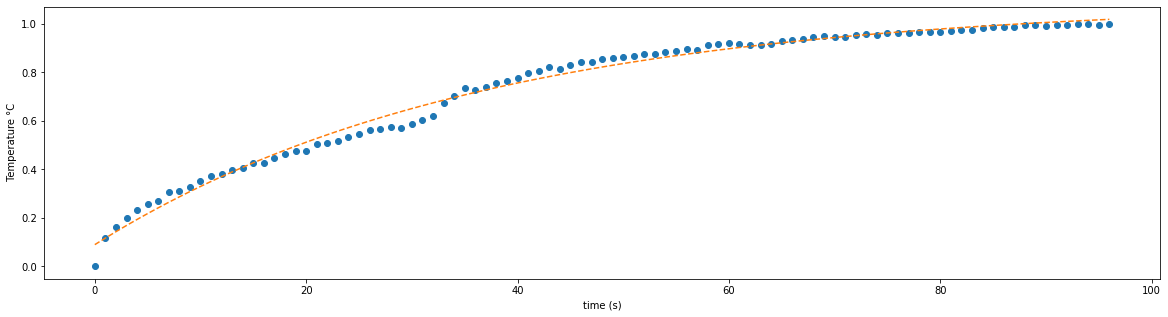

In [363]:
srf(tcn60, Tcn60)

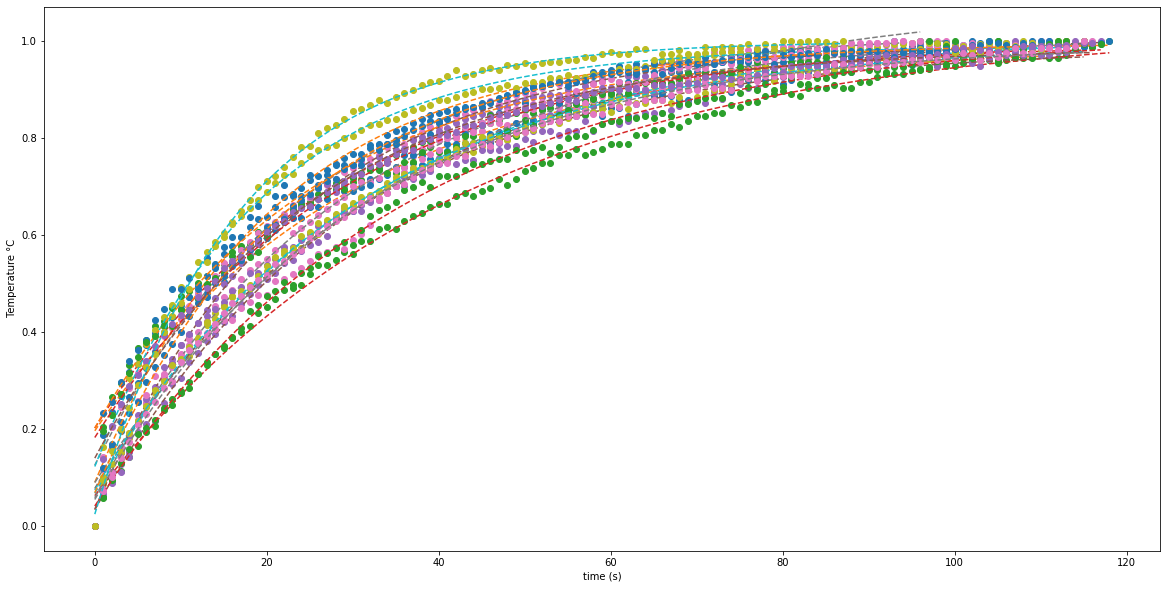

In [364]:
t = [tb40, tb60, tc40, tc60, tg40, tg60, ty40, ty60, tr40, tr60]
T = [Tb40, Tb60, Tc40, Tc60, Tg40, Tg60, Ty40, Ty60, Tr40, Tr60]
tn = [tbn40, tbn60, tcn40, tcn60, tgn40, tgn60, tyn40, tyn60, trn40, trn60]
Tn = [Tbn40, Tbn60, Tcn40, Tcn60, Tgn40, Tgn60, Tyn40, Tyn60, Trn40, Trn60]
b_high =[]
b_low =[]
for i in range(10):
 res = srf(t[i], T[i])
 b_high.append(res)
for i in range(10):
 resn = srf(tn[i], Tn[i])
 b_low.append(resn)
dataframe = np.c_[(b_high, b_low)]
pandasx = dataframe[0::2, :].reshape(-1)
pandasy = dataframe[1::2, :].reshape(-1)

In [365]:
highC_lowP = pandasx[0::2]
highC_highP = pandasy[0::2]

In [366]:
cqd_list = ['Blue', 'Cyan', 'Green', 'Yellow', 'Red']
df = pd.DataFrame([pandasx,pandasy],
                  index=pd.Index(['214.9 mW', '355.5 mW'], name='Laser Power:'),
                  columns=pd.MultiIndex.from_product([['b-cds', 'c-cds', 'g-cds', 'y-cds', 'r-cds'],['0.112 mg/ml', '0.0377 mg/ml']], names=['CQDS:', 'Concentration:']))
df.style

In [367]:
fig  = make_subplots()
fig.add_trace(go.Scatter(x = cqd_list, y = highC_lowP))

0.03644097086575089

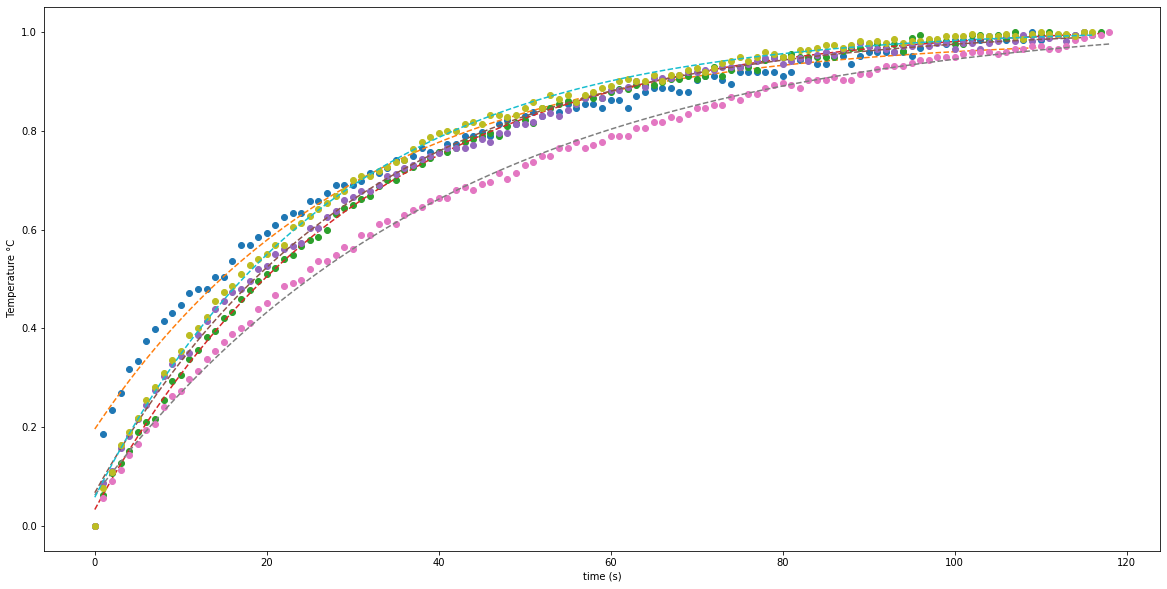

In [374]:
srf(tb40, Tb40)
srf(tc40, Tc40)
srf(tg40, Tg40)
srf(ty40, Ty40)
srf(tr40, Tr40)

In [376]:
def t63(t, T):
 Tnew = T[0:np.argmax(T)]
 Tnorm = (Tnew - np.min(Tnew))/(np.max(Tnew)- np.min(Tnew))
 t63 = t[np.max(np.where(Tnorm  <= np.max(Tnorm)*0.63)[0])]
 return (t63)

In [380]:
t63(tb40, Tb40)

22.0